LAB: Visualización de datos usando Matplotlib
==========================================

In [1]:
## inicialización
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas
%matplotlib inline

In [2]:
#Carga del archivo de indicadores mundiales
df = pandas.read_csv('indicadores-mundiales.csv',
                    sep=',', encoding='latin-1')

In [3]:
## Nombres de las columnas
df.columns

Index(['Ano', 'Dias para iniciar un negocio', 'Emisiones de CO2',
       'Esperanza de vida (mujeres)', 'Esperanza de vida (varones)',
       'Facilidad para hacer negocios', 'Gasto en salud ( del PIB)',
       'Gasto en salud (per capita)', 'Horas preparar los impuestos',
       'Interes de prestamos', 'PIB', 'Pais', 'Poblacion 0-14',
       'Poblacion 15-64', 'Poblacion 65+', 'Poblacion total',
       'Poblacion urbana', 'Region', 'Tasa de mortalidad infantil',
       'Tasa de natalidad', 'Tasa tributaria empresarial', 'Turismo emisor',
       'Turismo receptivo', 'Uso de Internet', 'Uso de energia',
       'Uso de telefonos celulares'],
      dtype='object')

In [4]:
## Computa la suma del porcentaje de la población por región
data = df.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
data

,Poblacion 0-14,Poblacion 15-64,Poblacion 65+
Region,,,
Asia,5318.6,10668.7,1013.0
Europa,3780.2,13830.6,2890.5
Las Americas,5375.5,10901.8,1223.1
Oceania,1784.8,3133.1,282.5
Oriente Medio,1754.7,3251.1,194.2
africa,11136.2,14452.7,911.7


## Punto 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-2.png)


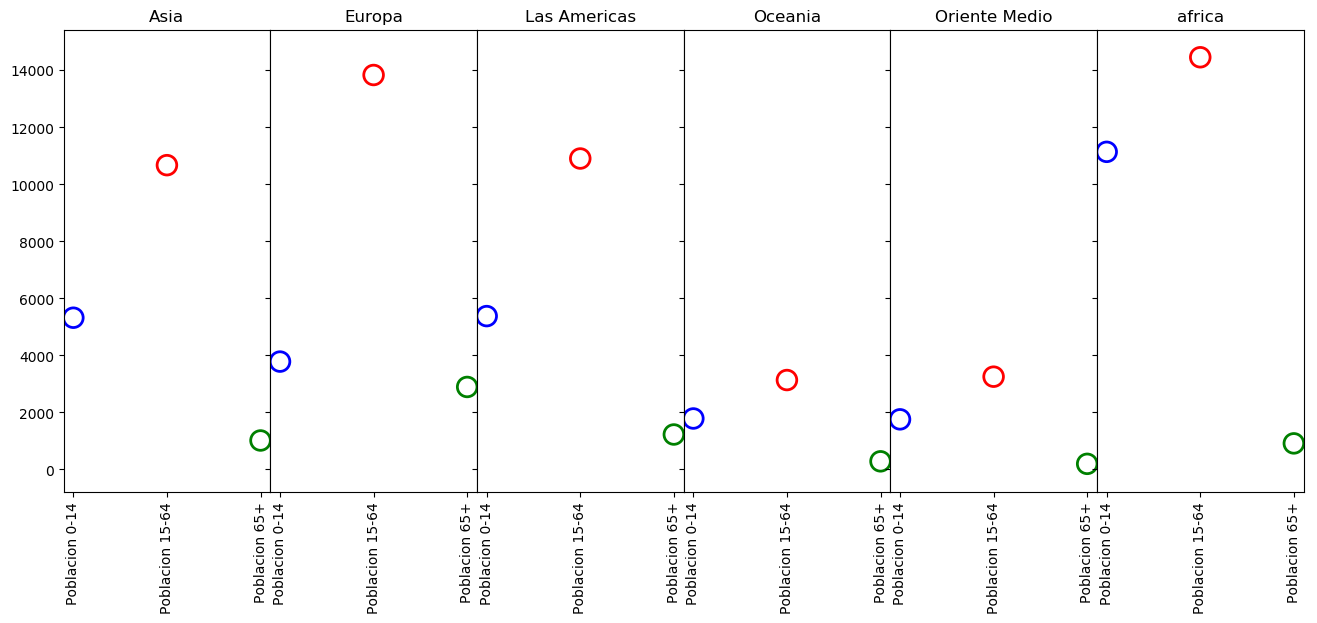

In [5]:
plt.style.use('default')
fig, axs = plt.subplots(1, 6, sharex='col', sharey='row', figsize=(16, 6));
plt.subplots_adjust(wspace = 0.0, hspace=0.01)


for index, colname in enumerate(data.T.columns):
    axs[index].scatter(list(data.T.index), data.T[colname], color='White',s=200, edgecolor=['blue', 'red', 'green'], linewidth = 2)
    axs[index].set_xticklabels(list(data.T.index),rotation='vertical');
    axs[index].set_title(colname)

## Punto 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-3.png)


In [6]:
data

,Poblacion 0-14,Poblacion 15-64,Poblacion 65+
Region,,,
Asia,5318.6,10668.7,1013.0
Europa,3780.2,13830.6,2890.5
Las Americas,5375.5,10901.8,1223.1
Oceania,1784.8,3133.1,282.5
Oriente Medio,1754.7,3251.1,194.2
africa,11136.2,14452.7,911.7


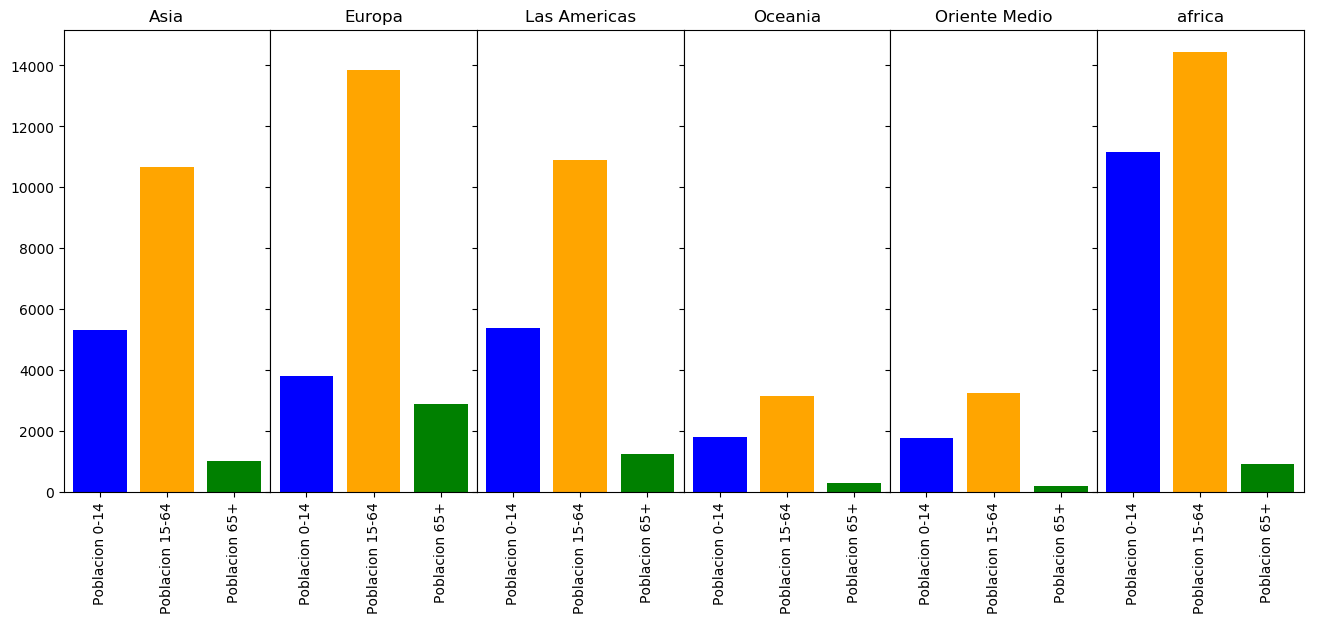

In [7]:
plt.style.use('default')
fig, axs = plt.subplots(1, 6, sharex='col', sharey='row', figsize=(16, 6));
plt.subplots_adjust(wspace = 0.0, hspace=0.01)
plt.title('Región')

for index, colname in enumerate(data.T.columns):
    axs[index].bar(list(data.T.index), data.T[colname], color=['blue', 'orange', 'green'],)
    axs[index].set_xticklabels(list(data.T.index),rotation='vertical');
    axs[index].set_title(colname)

## Punto 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act3](images/suma-pob-region-edades-4.png)

In [8]:
data

,Poblacion 0-14,Poblacion 15-64,Poblacion 65+
Region,,,
Asia,5318.6,10668.7,1013.0
Europa,3780.2,13830.6,2890.5
Las Americas,5375.5,10901.8,1223.1
Oceania,1784.8,3133.1,282.5
Oriente Medio,1754.7,3251.1,194.2
africa,11136.2,14452.7,911.7


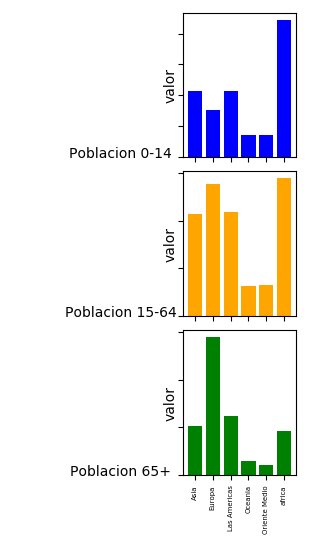

In [9]:
plt.style.use('default')
fig, axs = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(3, 6));
plt.subplots_adjust(wspace = 0.05, hspace=0.1)

colores = ['blue', 'orange', 'green']

for index, colname in enumerate(data.columns):
    axs[index][1].bar(list(data.index), data[colname], color=colores[index])
    axs[index][1].set_xticklabels(list(data.index), fontsize=5, rotation='vertical')
    axs[index][1].set_ylabel('valor')
    
for index in range(3):
    axs[index][0].axis('off');
    axs[index][0].text(0.5, 0, list(data.columns)[index], ha='center');
    

## Punto 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act4](images/prom-gastos-salud-per-capita-ano.png)

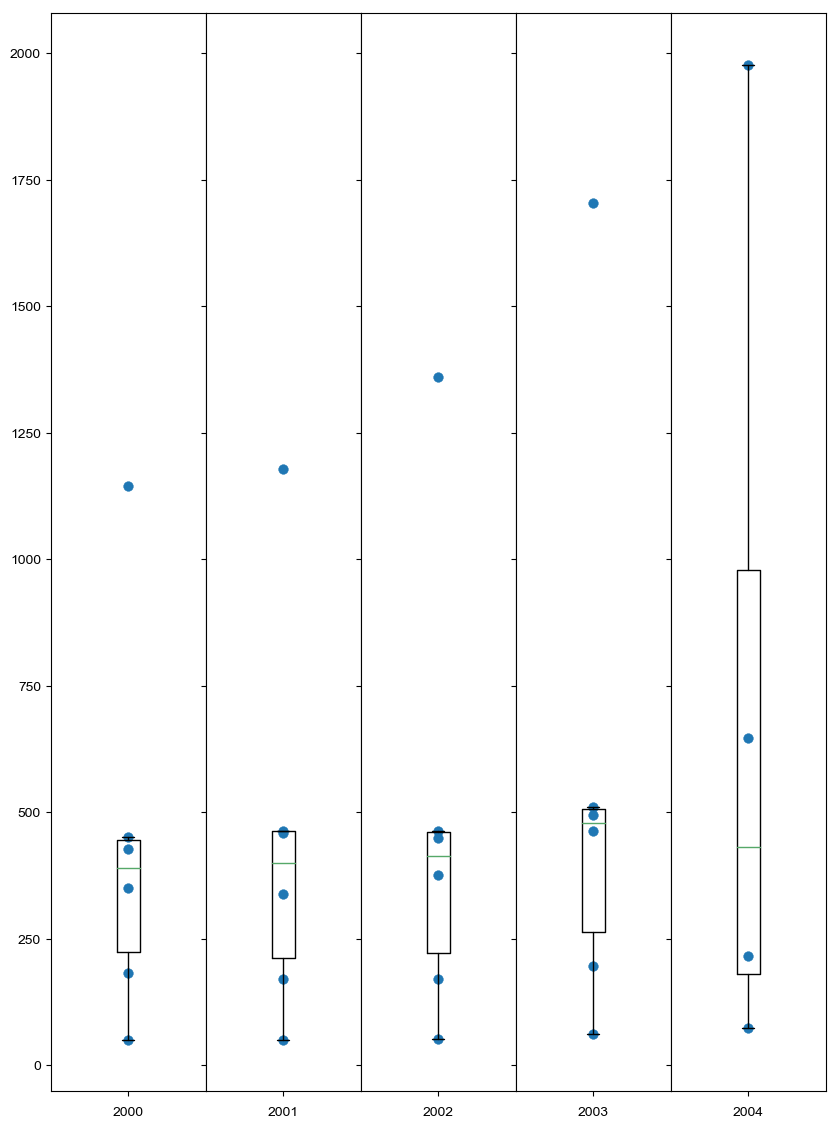

In [10]:
df = pandas.read_csv('indicadores-mundiales.csv',
                    sep=',', encoding='latin-1')

Year=[]
Year = [ i.split('-')[0] for i in df.Ano]
df['Year']=Year

New = df.copy()
New['Year'] = pandas.to_datetime(df['Year']).dt.year

New2 = New.groupby(['Year', 'Region'])['Gasto en salud (per capita)'].mean()

New3 = New2.to_frame()
New3.reset_index(inplace=True)  
New3 = New3.drop(['Region'], axis=1)
New3 = New3[['Year', 'Gasto en salud (per capita)']]

fig, axs = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(10, 14));
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace = 0, hspace=0)
plt.style.use('seaborn')
for i, colname in enumerate(New3['Year'].unique()):
    axs[i].boxplot(list(New3[New3['Year'] == colname].T.values[1]))
    axs[i].scatter(np.ones(New3[New3['Year'] == colname]['Gasto en salud (per capita)'].shape[0]), New3[New3['Year'] == colname]['Gasto en salud (per capita)'])
    axs[i].set_xticklabels([""])
    axs[i].set_xlabel(colname)
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(0)

## Punto 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act5](images/prom-region-edades-ano.png)

In [11]:
#Se lee el archivo
df['Ano']=df['Ano'].apply(lambda x:x[0:4])
data=df.groupby(['Region','Ano']).sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
data.T

Region             Asia                                  Europa          \
Ano                2000    2001    2002    2003    2004    2000    2001   
Poblacion 0-14   1106.6  1085.8  1064.4  1041.9  1019.9   785.5   770.8   
Poblacion 15-64  2100.5  2116.3  2133.3  2150.7  2167.9  2753.4  2760.1   
Poblacion 65+     193.3   197.6   202.3   207.6   212.2   561.4   569.2   

Region                                    ...   Oceania Oriente Medio         \
Ano                2002    2003    2004   ...      2003          2000   2001   
Poblacion 0-14    755.9   740.8   727.2   ...     439.8         446.4  441.5   
Poblacion 15-64  2766.2  2772.4  2778.5   ...     788.2         805.3  810.0   
Poblacion 65+     578.0   586.9   595.0   ...      72.1          48.2   48.6   

Region                         africa                                  
Ano               2002   2003    2000    2001    2002    2003    2004  
Poblacion 0-14   436.4  430.4  2252.0  2239.7  2227.0  2214.8  2202.7  
Poblacion 15-64  814.8  821.0  2866.1  2878.4  2890.9  2902.9  2914.4  
Poblacion 65+     48.7   48.7   181.8   182.6   182.7   182.2   182.4  

[3 rows x 28 columns]

Text(0.5,0.98,'Region/Ano')

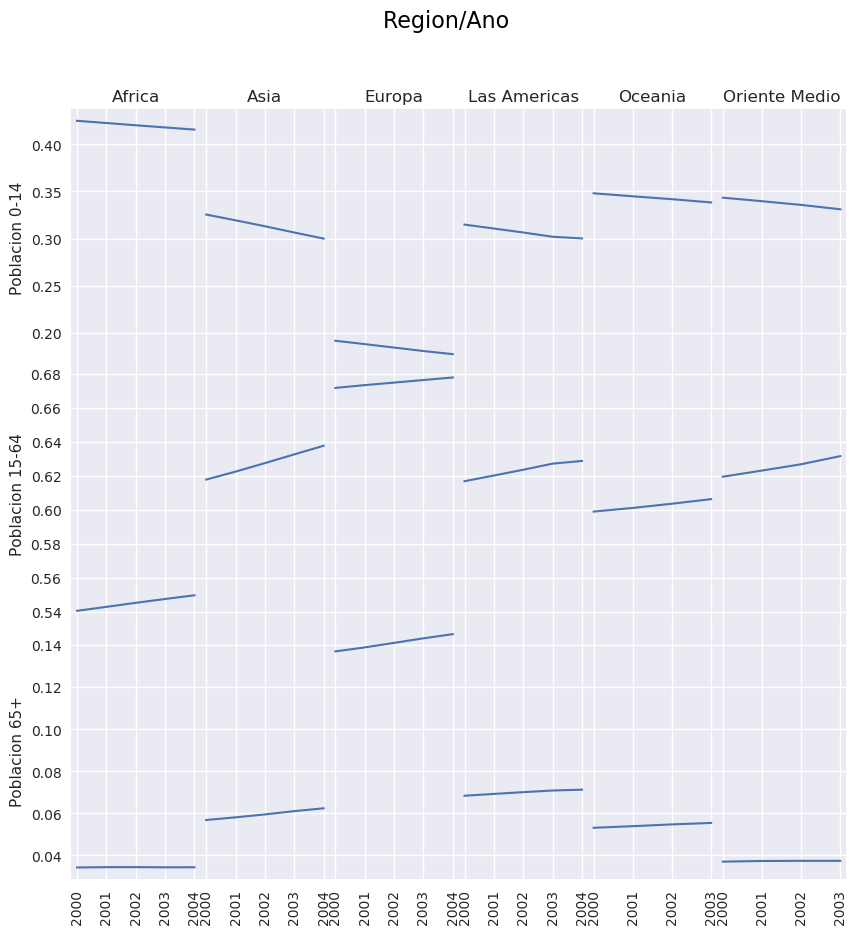

In [12]:
df = pandas.read_csv('indicadores-mundiales.csv',
                    sep=',', encoding='latin-1')

(df.loc[df['Region'] == "africa", "Region"]) = "Africa"
Year = []
Year = [ i.split('-')[0] for i in df.Ano]
df['Year'] = Year

New = df.copy()

Years = New.Year.unique()
AUX = pandas.DataFrame()

fig1, axs = plt.subplots(3, 6, sharex='col', sharey='row', figsize=(10, 10))
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace = 0, hspace=0)
plt.style.use('default')
lista=['Poblacion 0-14','Poblacion 15-64','Poblacion 65+']
for w, indname in enumerate(lista):
    for i, Anio in enumerate(Years):
        y=(New[New['Year'] == Anio].groupby('Region')[indname].mean()/100)
        AUX[Anio]=y
        y=[]
    AUX.index=New['Region'].unique()
    AUXT=AUX.T
    for i, colname in enumerate(AUXT.columns):
        axs[w,i].plot(AUXT[colname])
        if w==0:
            axs[w,i].set_title(colname)
        if i==0:
            axs[w,i].set_ylabel(indname)
        for tick in axs[w,i].get_xticklabels():
            tick.set_rotation(90)
fig1.suptitle('Region/Ano', fontsize=16)

---